In [1]:
import csv

In [2]:
input_file = 'iris.csv'
with open(input_file, 'r') as iris_data:
    irises = list(csv.reader(iris_data))

In [3]:
!pip3 install --upgrade pip
!pip3 install msgpack
!pip3 install matplotlib
%matplotlib inline

Requirement already up-to-date: pip in ./venv/lib/python3.7/site-packages (20.0.2)


In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7.5, 4.25))
plt.style.use('classic')

<Figure size 540x306 with 0 Axes>

In [5]:
colors = {"Iris-setosa": "#2B5B84", "Iris-versicolor": "g", "Iris-virginica": "purple"}

In [6]:
# remove empty trailing row
irises.pop()

[]

In [7]:
from itertools import groupby

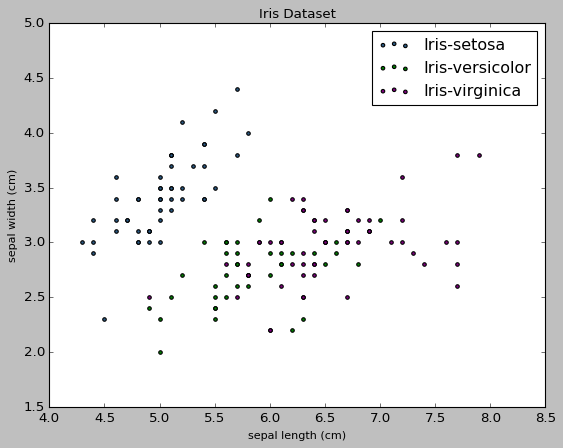

In [8]:
# group by species
for species, group in groupby(irises, lambda i: i[4]):
    grouped_irises = list(group)  # group is a generator
    sepal_lengths = [float(iris[0]) for iris in grouped_irises]
    sepal_widths = [float(iris[1]) for iris in grouped_irises]
    plt.scatter(sepal_lengths, sepal_widths, s=10, c=colors[species], label=species)

plt.title('Iris Dataset', fontsize=12)
plt.xlabel("sepal length (cm)", fontsize=10)
plt.ylabel("sepal width (cm)", fontsize=10)
plt.legend(loc="upper right")

plt.show()

In [9]:
virginica_petal_length = []

num_bins = 10

for i in range(len(irises) - 1):
    if irises[i][4] == "Iris-virginica":
        virginica_petal_length.append(float(irises[i][2]))
    

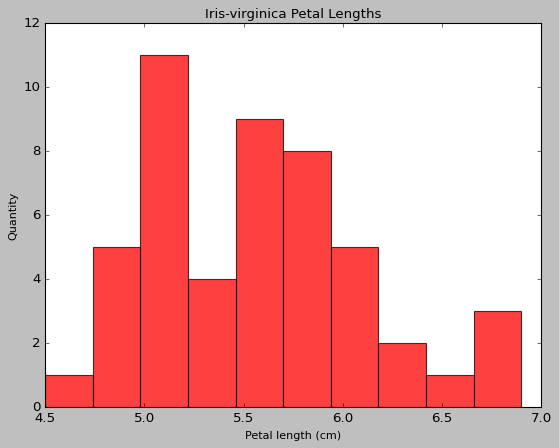

In [10]:
plt.hist(virginica_petal_length, num_bins, facecolor='red', alpha=0.75)

plt.title('Iris-virginica Petal Lengths', fontsize=12)
plt.xlabel('Petal length (cm)', fontsize=10)
plt.ylabel('Quantity', fontsize=10)

plt.show()

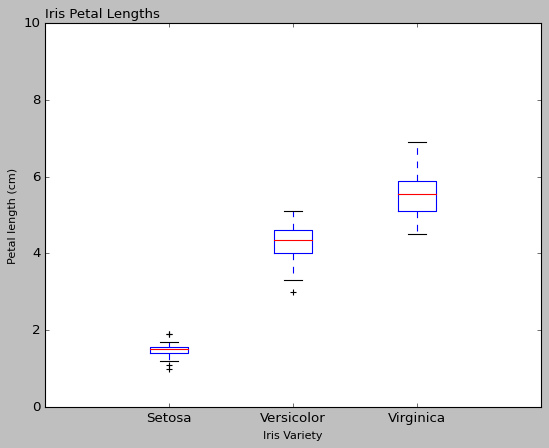

In [11]:
petal_lengths = []
for _, group in groupby(irises, lambda i: i[4]):
    petal_lengths.append([float(petal[2]) for petal in group])

plt.boxplot(petal_lengths)

plt.title("Iris Petal Lengths", fontsize=12, loc='left')
plt.axis([0, 4, 0, 10])
plt.xticks([1, 2, 3], ['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Iris Variety', fontsize=10)
plt.ylabel('Petal length (cm)', fontsize=10)

fig.savefig('petal_length_boxplot.png')

plt.show()